<div style="text-align: center;background-color: purple">
    <font color='white'</font>
    <h1>BHARAT VIRTUAL INTERNSHIP</h1>
    <h1>PROJECT TWO</h1>
    <h1>(TASK NAME: SMS CLASSIFIER)</h1>
</div>

## PROJECT OVERVIEW
- **Objective:** To develop a text classification model to classify SMS/EMAIL as spam or non-spam

- **Dataset:** [Link to my dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download?datasetVersionNumber=1)


- **Submission Date:** December 10, 2023

- **Author:** SUNMOLA M.A _sunmolaadeyanju@gmail.com_

- **References**: [Medium](https://yousufzai.medium.com/this-provides-a-comprehensive-overview-of-key-evaluation-metrics-for-classification-models-in-7466561116ec)

## STEP 1: DATA CLEANING & INITIAL EXPLORATION

1. Install necessary libraries
2. Import needed libraries
3. Load the dataset
4. Display a sample of the dataset
5. Explore the dataset's size and structure
6. Check for data type consistency
7. Handle possible inconstencies with dataset structure accordingly
8. Check for duplicates

## 1.1 Install Libraries
- This will install libraries necessary for this project
- This is to guide against error in cases where this code is run on a different machine where the libraries have not been pre-installed

In [1]:
!pip install nltk
!pip install wordcloud

## 1.2 Import necessary dependencies

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra

#Additional packages
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

## 1.3 Load the dataset

In [3]:
data=pd.read_csv("spam.csv", encoding="latin-1")

## 1.4 Preview a random sample of the dataset

In [4]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2030,ham,"Ugh y can't u just apologize, admit u were wro...",NaN,NaN,NaN
4950,ham,hi baby im sat on the bloody bus at the mo and...,NaN,NaN,NaN
3715,ham,Networking technical support associate.,NaN,NaN,NaN
5144,ham,I'm in office now da:)where are you?,NaN,NaN,NaN
2683,ham,I'm okay. Chasing the dream. What's good. What...,NaN,NaN,NaN


## 1.5 Explore the dataset's structure, size and contents
- Check the shape of the dataset
- Check general information about the structure of the dataset
- Check for missing values

In [5]:
data.shape

(5572, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## 1.5 INFERENCE
- The dataset contains 5 features with 5,572 records
- The last 3 features each contains more than 95% null values.
- Hence, the best way to handle these features is to drop them
- Plus, there is liitle or no information about what these features represents


## 1.6. Check for data type consistency

In [8]:
# Create an empty dataframe to store the results
data_type= pd.DataFrame(columns=['COLUMN NAMES', 'UNIQUE DATA TYPES'])

# Iterate through columns and store unique data types in the new dataframe
for column_name in data.columns:
    unique_data_types = data[column_name].apply(type).unique()
    data_type = pd.concat([data_type, pd.DataFrame({'COLUMN NAMES': [column_name], 'UNIQUE DATA TYPES': [unique_data_types]})],ignore_index=True)

# Display the resulting table
print(data_type)

  COLUMN NAMES                 UNIQUE DATA TYPES
0           v1                   [<class 'str'>]
1           v2                   [<class 'str'>]
2   Unnamed: 2  [<class 'float'>, <class 'str'>]
3   Unnamed: 3  [<class 'float'>, <class 'str'>]
4   Unnamed: 4  [<class 'float'>, <class 'str'>]


## 1.6 INFERENCE
- Looking more closely, these 3 features contains more than one data type
- These iterates the need to dispose them as there would not be need for any type casting

## 1.7 Handle inconsistent data
- Drop unnecessary columns
- Rename columns for clarity
- Tranform the target variables for clarity

In [9]:
# Dropping unnecessary features

data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
data.sample(5)

,v1,v2
160,ham,Keep yourself safe for me because I need you a...
4405,spam,As one of our registered subscribers u can ent...
4537,ham,Dare i ask... Any luck with sorting out the car?
488,ham,Depends on quality. If you want the type i sen...
1513,ham,Hows the champ just leaving glasgow!


In [10]:
#Rename columns for clarity

data.rename(columns={"v1":"target", "v2":"message"}, inplace=True)
data.sample(5)

,target,message
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
3605,ham,"That means you got an A in epi, she.s fine. Sh..."
894,ham,Doesn't g have class early tomorrow and thus s...
1962,spam,it to 80488. Your 500 free text messages are v...
5278,spam,URGENT! Your Mobile number has been awarded wi...


In [11]:
#Transform 'ham' to 'not spam' in the target variable for clarity

data['target'] = data['target'].replace('ham', 'not spam')
data.sample(5)

,target,message
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no..."
2076,not spam,"Trust me. Even if isn't there, its there."
1201,not spam,I know she called me
4075,spam,87077: Kick off a new season with 2wks FREE go...
2493,not spam,they released another Italian one today and it...


## 1.7 INFERENCE
- Now, we are left with features that are relevant to this project solution
- And we can also be sure that the data is now suitable for explaoration with vivid contents

## 1.8. Check for and drop duplicates entries

In [12]:
duplicates_data=data[data.duplicated()]
duplicates_data
len(duplicates_data)

403

In [13]:
data=data.drop_duplicates(keep='first')

pd.set_option('display.max_colwidth', None) #This would enable us to view the whole message length
data.sample(5)

#pd.reset_option('display.max_colwidth')    #To reset the view option to default

,target,message
2587,not spam,"Aight, see you in a bit"
4743,not spam,"\Thinking of u ;) x\"""""
1405,not spam,K..k..any special today?
2816,spam,"Gr8 Poly tones 4 ALL mobs direct 2u rply with POLY TITLE to 8007 eg POLY BREATHE1 Titles: CRAZYIN, SLEEPINGWITH, FINEST, YMCA :getzed.co.uk POBox365O4W45WQ 300p"
1263,not spam,Ok. No wahala. Just remember that a friend in need ...


## 1.8 INFERENCE
- The dataset contains 403 duplicate entries
- Well, they have noe been deleted from the dataset

## STEP 2: EXPLORATORY DATA ANALYSIS

1. Explore basic statistics of the data
2. Check for imbalance between spam and non-spam classes
3. Visualize class distribution
4. Feature Engineering
5. Explore various Viz to understand feature relationships

## 2.1. Display descriptive statistics for the dataset

In [14]:
data.describe()

,target,message
count,5169,5169
unique,2,5169
top,not spam,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
freq,4516,1


## 2.2 Check for imbalance between spam and non-spam classes

In [15]:
data['target'].value_counts()

not spam    4516
spam         653
Name: target, dtype: int64

## 2.2 INFERENCE
- The target feature contains only two uniques values - SPAM & NOT SPAM
- The "not spam" represents larger percentage of the target column

## 2.3 Visualize class distribution

([<matplotlib.patches.Wedge at 0x1d491e02cb0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.4%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.6%')])

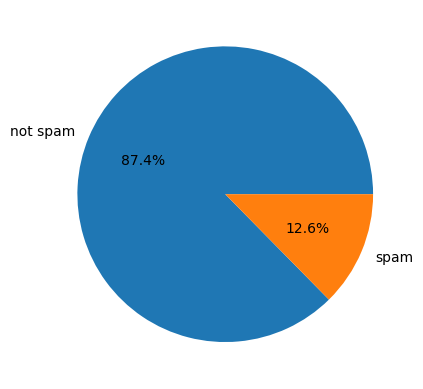

In [16]:
plt.pie(data['target'].value_counts(),labels=['not spam','spam'],autopct="%.1f%%")

## 2.4 Feature Engineering
- Add new features such as:
    - No of message characters
    - No of message words
    - No of message sentences
    
- Display descriptive statistics for the new features
- Display descriptive statistics for **spam** and **not spam** messages
- Visualize the distribution of message lengths

### 2.4.1  Add new features

In [17]:
data['num_characters'] = data['message'].apply(len)
data['num_words'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentences'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

data.sample(5)

,target,message,num_characters,num_words,num_sentences
4269,not spam,Great. Hope you are using your connections from mode men also cos you can never know why old friends can lead you to today,122,25,2
2578,not spam,Erm. I thought the contract ran out the4th of october.,54,12,2
1594,not spam,Never blame a day in ur life. Good days give u happiness. Bad days give u experience. Both are essential in life! All are Gods blessings! good morning.:,152,35,7
131,not spam,"Dear, will call Tmorrow.pls accomodate.",39,7,1
3189,not spam,Hi neva worry bout da truth coz the truth will lead me 2 ur heart. ItåÕs the least a unique person like u deserve. Sleep tight or morning,137,30,3


### 2.4.2 Display descriptive statistics for the new features

In [18]:
data.describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


### 2.4.3A Display descriptive statistics for **not spam** messages

In [19]:
data[data['target']=='not spam'].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


### 2.4.3B Display descriptive statistics for spam messages

In [20]:
data[data['target']=='spam'].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### 2.4.4 Visualize the distribution of message lengths

Text(0.5, 1.0, 'Distribution of Message Lengths')

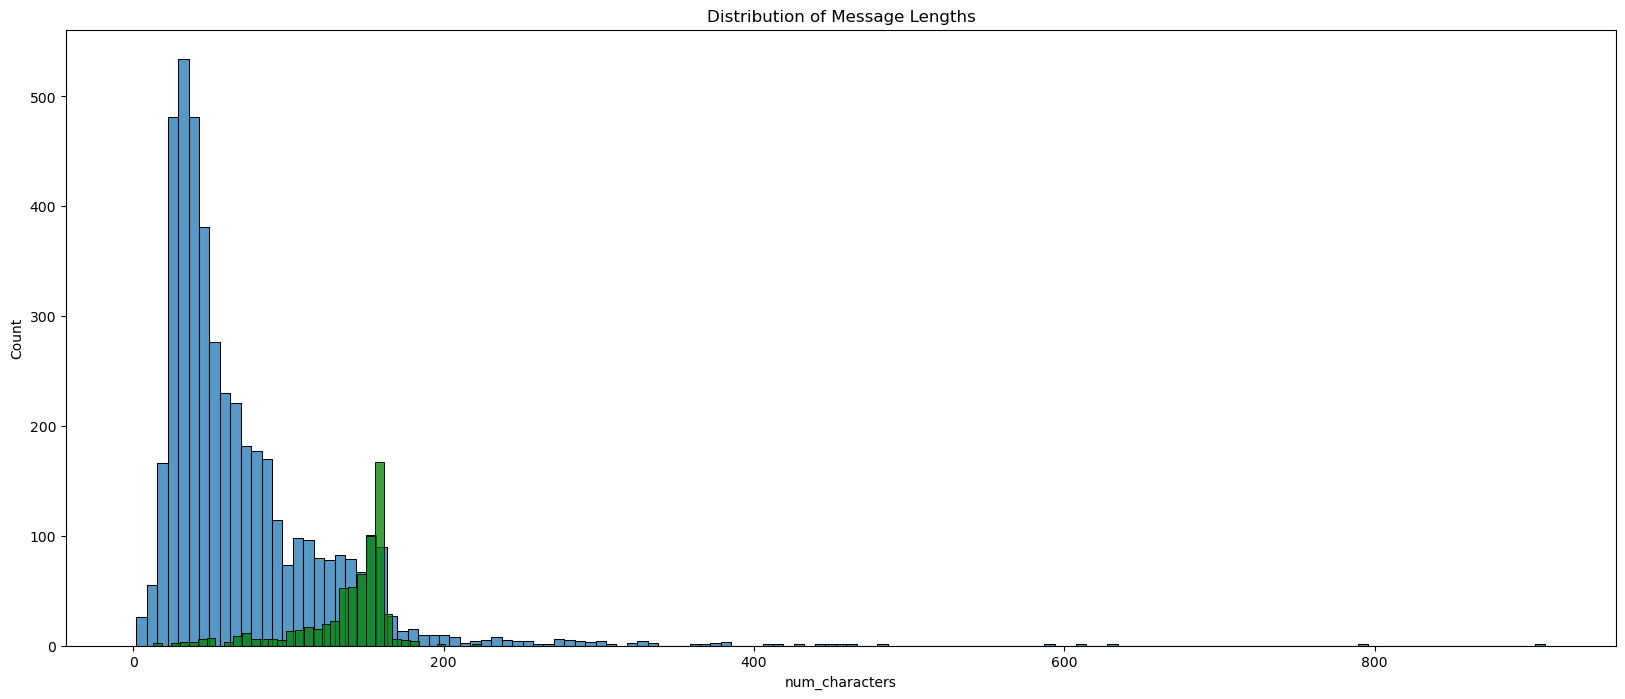

In [21]:
plt.figure(figsize=(20,8))
sns.histplot(data[data['target'] == 'not spam']['num_characters'])
sns.histplot(data[data['target'] == 'spam']['num_characters'], color='green')
plt.title('Distribution of Message Lengths')

## 2.5 Features Relationships Viz
-  Create a pairplot and heatmap for further exploration

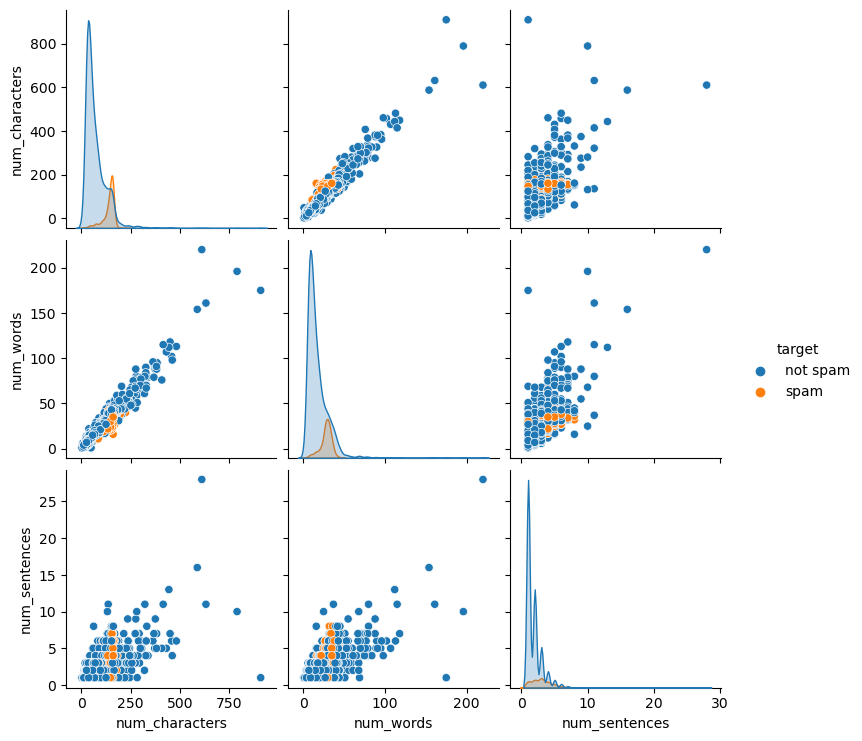

In [22]:
#Pairplot
sns.pairplot(data, hue='target')
#plt.title('Pairplot of Features')

C:\Users\msunmola\AppData\Local\Temp\ipykernel_23232\1396198823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


Text(0.5, 1.0, 'Correlation Heatmap')

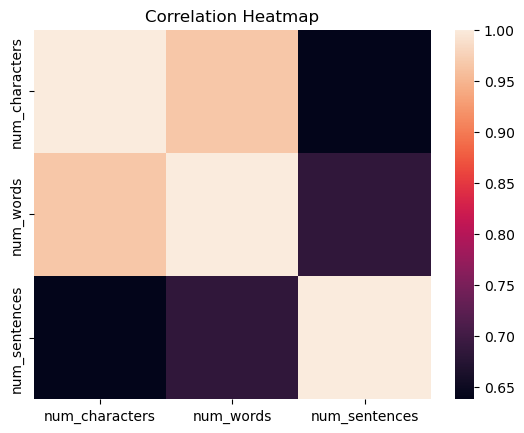

In [23]:
#Heatmap
sns.heatmap(data.corr())
plt.title('Correlation Heatmap')

## STEP 3: DATA PREPROCESSING
1. Create a function to clean and transform messages
    1. Lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctiations
2. Apply the cleaning function to the 'message' field
3. Visualize the word clouds for each target variables
4. Analyze and visualize top 20 words in each target variables

## 3.1. Define a function for cleaning messages

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def clean_message(msg):
    # Lowercase the text
    msg = msg.lower()
    
    # Tokenize the text
    msg_tokens = nltk.word_tokenize(msg)
    
    # Initialize stemmer
    ps = PorterStemmer()
    
    # Create a list to store cleaned tokens
    cleaned_tokens = []
    
    for token in msg_tokens:
        # Remove non-alphanumeric characters
        cleaned_token = ''.join(char for char in token if char.isalnum())
        if cleaned_token:
            cleaned_tokens.append(cleaned_token)
    
    # Remove stopwords and punctuation
    cleaned_tokens = [token for token in cleaned_tokens if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Stemming
    cleaned_tokens = [ps.stem(token) for token in cleaned_tokens]
    
    # Join the cleaned tokens into a string
    cleaned_text = " ".join(cleaned_tokens)
    
    # Remove non-ASCII characters
    cleaned_text = ''.join(char for char in cleaned_text if ord(char) < 128)
    
    return cleaned_text


## 3.2 Apply the cleaning function to the 'message' field

In [25]:
data['transformed_msg'] = data['message'].apply(clean_message)
data.sample(5)

,target,message,num_characters,num_words,num_sentences,transformed_msg
507,not spam,You should know now. So how's anthony. Are you bringing money. I've school fees to pay and rent and stuff like that. Thats why i need your help. A friend in need....|,166,41,6,know anthoni bring money school fee pay rent stuff like that need help friend need
4030,not spam,"Sorry vikky, i'm Watching olave mandara movie kano in trishul theatre wit my frnds..",84,17,1,sorri vikki watch olav mandara movi kano trishul theatr wit frnd
456,not spam,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN AND I LIKE U A LOT. I KNOW U DONåÕT LIKE ME LIKE THAT SO DONåÕT WORRY.",117,28,2,look ami ure beauti intellig woman like u lot know u dont like like dont worri
4091,not spam,I remain unconvinced that this isn't an elaborate test of my willpower,70,13,1,remain unconvinc nt elabor test willpow
1032,not spam,HAPPY NEW YEAR MY NO.1 MAN,26,6,1,happi new year no1 man


## 3.3 Visualize word clouds for the target variables - SPAM & NOT SPAM

### For spam messages

Text(0.5, 1.0, 'Word Cloud for Spam Messages')

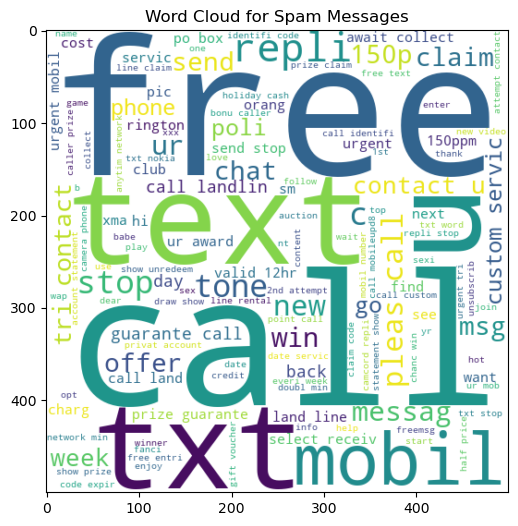

In [26]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc=wc.generate(data[data['target']=='spam']['transformed_msg'].str.cat(sep=" "))

plt.figure(figsize=(6, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')

### For non-spam messages

Text(0.5, 1.0, 'Word Cloud for Non-spam Messages')

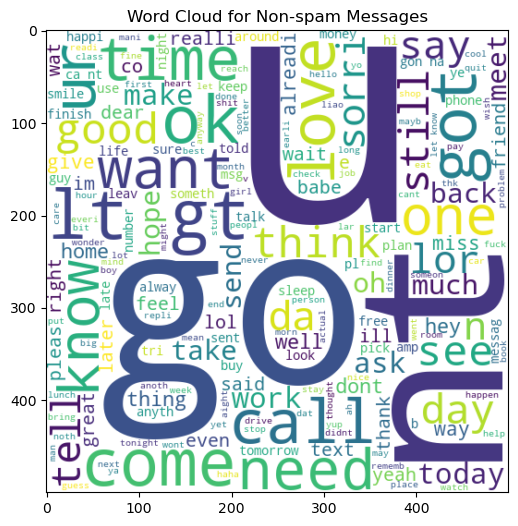

In [27]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
not_spam_wc=wc.generate(data[data['target']=='not spam']['transformed_msg'].str.cat(sep=" "))


plt.figure(figsize=(6, 6))
plt.imshow(not_spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Non-spam Messages')

## 3.4 Analyze and visualize top 20 words in each target variables

### For spam messages

In [28]:
#Based on the word cloud images for spam messages above,
#I would like to put all spam words in a container called encyclopaedia

spam_encyclopedia=[]
for msg in data[data['target']=='spam']['transformed_msg'].to_list():
    for word in msg.split():
        spam_encyclopedia.append(word)
        
print("MOST LIKELY SPAM WORDS ARE : \n\n", spam_encyclopedia)

MOST LIKELY SPAM WORDS ARE : 

 ['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', '150', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', '20000', 'pound', 'txt', 'csh11', 'send', '87575', 'cost', '150pday', '6day', '16', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', '100000', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'wwwdbuknet', 'lcclt

Text(0.5, 1.0, 'Top 20 Words in SPAM encyclopaedia')

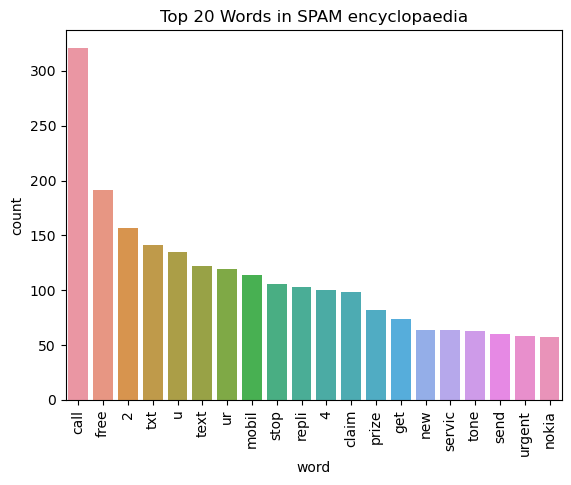

In [29]:
#However, it would be more nice to view the spam encyclopaedia in a dataframe.
#This would enable further exploration and visualizations

from collections import Counter
spam_df=pd.DataFrame(Counter(spam_encyclopedia).most_common(20), columns=['word','count'])
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.title('Top 20 Words in SPAM encyclopaedia')


### For non-spam messages

In [30]:
#In the same vein, based on the word cloud images for n0n-spam messages,
#I would like to put all non-spam words in a container called encyclopaedia

not_spam_encyclopedia=[]
for msg in data[data['target']=='not spam']['transformed_msg'].to_list():
    for word in msg.split():
        not_spam_encyclopedia.append(word)
        
print("MOST LIKELY NON-SPAM WORDS ARE : \n\n", not_spam_encyclopedia)

MOST LIKELY NON-SPAM WORDS ARE : 

 ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'nt', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'nt', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'that', 'way', 'u', 'feel', 'that', 'way', 'gota', 'b', 'serious'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'nt'),
  Text(3, 0, 'get'),
  Text(4, 0, '2'),
  Text(5, 0, 'gt'),
  Text(6, 0, 'lt'),
  Text(7, 0, 'come'),
  Text(8, 0, 'ok'),
  Text(9, 0, 'got'),
  Text(10, 0, 'know'),
  Text(11, 0, 'like'),
  Text(12, 0, 'call'),
  Text(13, 0, 'time'),
  Text(14, 0, 'love'),
  Text(15, 0, 'good'),
  Text(16, 0, 'want'),
  Text(17, 0, 'ur'),
  Text(18, 0, 'day'),
  Text(19, 0, 'need')])

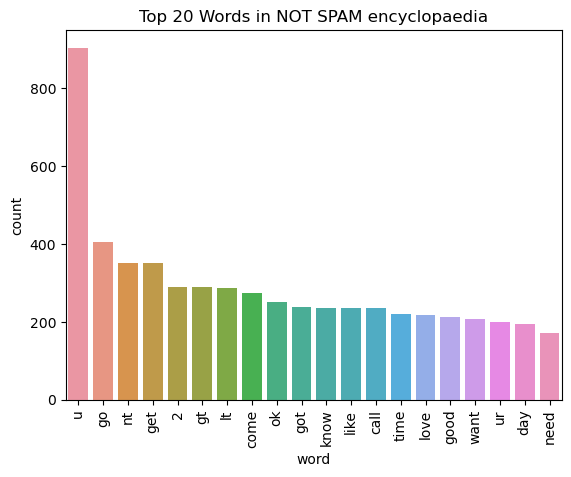

In [31]:
#Again, for visualization sake,

not_spam_df=pd.DataFrame(Counter(not_spam_encyclopedia).most_common(20), columns=['word','count'])
sns.barplot(x='word', y='count', data=not_spam_df)
plt.title('Top 20 Words in NOT SPAM encyclopaedia')
plt.xticks(rotation='vertical')

# STEP 4: MODEL BUILDING

- Label Encoding
- Model Selection

## 4.1 Label encoding

In [46]:
# Encoding the target variable

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

# Print the mapping of original labels to encoded labels
print("\nLabel Mapping:")
for original, encoded in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(f"{original} is encoded as {encoded}")



Label Mapping:
0 is encoded as 0
1 is encoded as 1


## 4.2 Model Selection

In [36]:
# Import necessary dependencies
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create instances of various classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#Create dictionary list of all the models you intend to use
model_list = {'Support Vector Classifier':svc,
          'Linear Regression Clssifier':lrc,
          'Decision Tree Classifier':dtc,
          'RANDOM Forest Classifier':rfc,
          'XG Boost':xgb,
          'MultinomialNB':mnb,
          'BernoulliNB': bnb,
          'GaussianNB':gnb,
          'K-Nearest Neighbor Classifier':knc
}

# STEP 5: MODEL TRAINING & EVALUATION

### 5.1 USING COUNT VECTORIZER
- Create a CountVectorizer text vectorization
- Split data into training and test sets
- Train & Evaluate the models
- Display/Compare evaluation metrics among the models


### 5.2 USING TFIDF VECTORIZER
- Text vectorization with TFIDF Vectorizer
- Compare Evaluation metrics for the models


### 5.3 USING TFIDF VECTORIZER WITH MAX FEATURES
- Text vectorization with max features of TFIDF
- Compare Evaluation metrics for the models

### 5.4 FINAL MODEL SELECTION
- Merge all resulting model evaluations
- Compare & Contrast for best model decision

### 5.5 MODEL SERIALIZATION

## 5.1 USING COUNT VECTORIZER

In [54]:
#A Use CountVectorizer to convert text data into a matrix of token counts
cv = CountVectorizer()
X = cv.fit_transform(data['transformed_msg']).toarray()
y = data['target'].values


#B Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



#C Train and Evaluate model performance
    #Create a training and evaluation function
    #This is necessary coz I intend to make use of 7 models.
    #Hence, training and evaluating each model separately/one-after-the-other would be time consuming

def train_and_evaluate_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


#D Create a for-loop to print each of the model evaluation metrics
accuracy_scores = []
precision_scores = []

for name, clf in model_list.items():
    current_accuracy, current_precision = train_and_evaluate_model(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    
    
#E Compare Evaluation Metrics among Models
CV_ModelPerformance = pd.DataFrame({'Model Name':model_list.keys(),'CV Accuracy':accuracy_scores,'CV Precision':precision_scores}).sort_values('CV Precision',ascending=False)
CV_ModelPerformance


For  Support Vector Classifier
Accuracy:  0.9313346228239845
Precision:  0.7557251908396947
For  Linear Regression Clssifier
Accuracy:  0.97678916827853
Precision:  0.9830508474576272
For  Decision Tree Classifier
Accuracy:  0.9264990328820116
Precision:  0.8974358974358975
For  RANDOM Forest Classifier
Accuracy:  0.965183752417795
Precision:  1.0
For  XG Boost
Accuracy:  0.9748549323017408
Precision:  0.9666666666666667
For  MultinomialNB
Accuracy:  0.9690522243713733
Precision:  0.8581081081081081
For  BernoulliNB
Accuracy:  0.9738878143133463
Precision:  0.9743589743589743
For  GaussianNB
Accuracy:  0.8868471953578336
Precision:  0.5466666666666666
For  K-Nearest Neighbor Classifier
Accuracy:  0.9032882011605415
Precision:  1.0


,Model Name,CV Accuracy,CV Precision
3,RANDOM Forest Classifier,0.965184,1.000000
8,K-Nearest Neighbor Classifier,0.903288,1.000000
1,Linear Regression Clssifier,0.976789,0.983051
6,BernoulliNB,0.973888,0.974359
4,XG Boost,0.974855,0.966667
2,Decision Tree Classifier,0.926499,0.897436
5,MultinomialNB,0.969052,0.858108
0,Support Vector Classifier,0.931335,0.755725
7,GaussianNB,0.886847,0.546667


## 5.2 USING TFIDF VECTORIZER

In [53]:
#A Use TFIDF Vectorizer to convert text data into a matrix of token counts
tfidf=TfidfVectorizer()
X_tfdf = tfidf.fit_transform(data['transformed_msg']).toarray()

#B Split the data into training and testing sets
X_tfdf_train,X_tfdf_test, y_tfdf_train,y_tfdf_test = train_test_split(X_tfdf,y, test_size=0.2, random_state=2)


#C Train and Evaluate model performance
accuracy_scores=[]
precision_scores=[]

for name,clf in model_list.items():
    current_accuracy, current_precision = train_and_evaluate_model(clf,X_tfdf_train,y_tfdf_train,X_tfdf_test,y_tfdf_test)
    print("For ", name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

#D Compare Evaluation Metrics among Models
TFDF_ModelPerformance = pd.DataFrame({'Model Name':model_list.keys(),'TFDF Accuracy':accuracy_scores,'TFDF Precision':precision_scores}).sort_values('TFDF Precision',ascending=False)
TFDF_ModelPerformance

For  Support Vector Classifier
Accuracy:  0.971953578336557
Precision:  0.9739130434782609
For  Linear Regression Clssifier
Accuracy:  0.9497098646034816
Precision:  0.9387755102040817
For  Decision Tree Classifier
Accuracy:  0.9361702127659575
Precision:  0.8673469387755102
For  RANDOM Forest Classifier
Accuracy:  0.9709864603481625
Precision:  1.0
For  XG Boost
Accuracy:  0.9748549323017408
Precision:  0.9516129032258065
For  MultinomialNB
Accuracy:  0.9584139264990329
Precision:  1.0
For  BernoulliNB
Accuracy:  0.9738878143133463
Precision:  0.9743589743589743
For  GaussianNB
Accuracy:  0.8810444874274661
Precision:  0.5345622119815668
For  K-Nearest Neighbor Classifier
Accuracy:  0.8974854932301741
Precision:  1.0


,Model Name,TFDF Accuracy,TFDF Precision
3,RANDOM Forest Classifier,0.970986,1.000000
5,MultinomialNB,0.958414,1.000000
8,K-Nearest Neighbor Classifier,0.897485,1.000000
6,BernoulliNB,0.973888,0.974359
0,Support Vector Classifier,0.971954,0.973913
4,XG Boost,0.974855,0.951613
1,Linear Regression Clssifier,0.949710,0.938776
2,Decision Tree Classifier,0.936170,0.867347
7,GaussianNB,0.881044,0.534562


## 5.3 USING TFIDF VECTORIZER WITH MAX FEATURES

In [56]:
#A Use TFIDF Vectorizer with max features to convert text data into a matrix of token counts
tfidf_max=TfidfVectorizer(max_features=3000)
X_MaxFeat = tfidf_max.fit_transform(data['transformed_msg']).toarray()


#B Split the data into training and testing sets
X_MaxFeat_train,X_MaxFeat_test, y_MaxFeat_train,y_MaxFeat_test = train_test_split(X_MaxFeat,y, test_size=0.2, random_state=2)


#C Train and Evaluate model performance
accuracy_scores=[]
precision_scores=[]

for name,clf in model_list.items():
    current_accuracy, current_precision = train_and_evaluate_model(clf, X_MaxFeat_train,y_MaxFeat_train,X_MaxFeat_test,y_MaxFeat_test)
    print("For ", name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


#D Compare Evaluation Metrics among Models
TFDFMax_ModelPerformance = pd.DataFrame({'Model Name':model_list.keys(),'TFDF_max Accuracy':accuracy_scores,'TFDF_max Precision':precision_scores}).sort_values('TFDF_max Precision',ascending=False)
TFDFMax_ModelPerformance

For  Support Vector Classifier
Accuracy:  0.9738878143133463
Precision:  0.9743589743589743
For  Linear Regression Clssifier
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For  Decision Tree Classifier
Accuracy:  0.9323017408123792
Precision:  0.8695652173913043
For  RANDOM Forest Classifier
Accuracy:  0.97678916827853
Precision:  0.9830508474576272
For  XG Boost
Accuracy:  0.9709864603481625
Precision:  0.9285714285714286
For  MultinomialNB
Accuracy:  0.9748549323017408
Precision:  1.0
For  BernoulliNB
Accuracy:  0.9864603481624759
Precision:  0.9920634920634921
For  GaussianNB
Accuracy:  0.8762088974854932
Precision:  0.5221238938053098
For  K-Nearest Neighbor Classifier
Accuracy:  0.9042553191489362
Precision:  1.0


,Model Name,TFDF_max Accuracy,TFDF_max Precision
5,MultinomialNB,0.974855,1.000000
8,K-Nearest Neighbor Classifier,0.904255,1.000000
6,BernoulliNB,0.986460,0.992063
3,RANDOM Forest Classifier,0.976789,0.983051
0,Support Vector Classifier,0.973888,0.974359
1,Linear Regression Clssifier,0.958414,0.970297
4,XG Boost,0.970986,0.928571
2,Decision Tree Classifier,0.932302,0.869565
7,GaussianNB,0.876209,0.522124


### 5.4 FINAL MODEL SELECTION
- Merge all resulting model evaluations
- Compare & Contrast for best model decision

In [57]:
# Merge the first two dataframes
merged_data = pd.merge(CV_ModelPerformance, TFDF_ModelPerformance, on="Model Name", how="inner")

# Merge the third dataframe with the already merged dataframe
final_merged_data = pd.merge(merged_data, TFDFMax_ModelPerformance, on="Model Name", how="inner")

# Print or use the final_merged_df as needed
final_merged_data

,Model Name,CV Accuracy,CV Precision,TFDF Accuracy,TFDF Precision,TFDF_max Accuracy,TFDF_max Precision
0,RANDOM Forest Classifier,0.965184,1.000000,0.970986,1.000000,0.976789,0.983051
1,K-Nearest Neighbor Classifier,0.903288,1.000000,0.897485,1.000000,0.904255,1.000000
2,Linear Regression Clssifier,0.976789,0.983051,0.949710,0.938776,0.958414,0.970297
3,BernoulliNB,0.973888,0.974359,0.973888,0.974359,0.986460,0.992063
4,XG Boost,0.974855,0.966667,0.974855,0.951613,0.970986,0.928571
5,Decision Tree Classifier,0.926499,0.897436,0.936170,0.867347,0.932302,0.869565
6,MultinomialNB,0.969052,0.858108,0.958414,1.000000,0.974855,1.000000
7,Support Vector Classifier,0.931335,0.755725,0.971954,0.973913,0.973888,0.974359
8,GaussianNB,0.886847,0.546667,0.881044,0.534562,0.876209,0.522124


## 5.5 Model Serialization

In [45]:
import pickle
pickle.dump(tfidf_max, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))